In [4]:
import os 
import numpy as np

In [35]:
# Scanning g vs g
scen = 3
mX = 0.005

basesX=(1, 1.5, 2, 3, 4, 6, 8)
expX=range(-12,-5)

expX_0=range(5,12)
expX_1=range(1,9)
expX_2=range(5,12)
expX_3=range(1,9)
expX_4=range(5,12)

basesY=(1, 1.5, 2, 3, 4, 6, 8)
expY=range(-10,-6)

g_CCRun = [ba*10**exp for ba in basesX for exp in expX]
g_ABRun = [ba*10**exp for ba in basesY for exp in expY]

np.savez_compressed("./storage/g_g_rangeX", expX_0=expX_0, expX_1=expX_1, expX_2=expX_2, expX_3=expX_3, expX_4=expX_4)

nMC = 10000

In [36]:
data = np.load("./storage/g_g_rangeX.npz")

g_CCRun = [ba/10**exp for ba in basesX for exp in data["expX_"+str(scen)]]
g_ABRun = [ba*10**exp for ba in basesY for exp in expY]

In [37]:
print(type("expX_"+str(scen)))
print(data["expX_"+str(scen)])
print(list(data["expX_"+str(scen)]))
print(type(data["expX_"+str(scen)]))

<class 'str'>
[1 2 3 4 5 6 7 8]
[1, 2, 3, 4, 5, 6, 7, 8]
<class 'numpy.ndarray'>


In [38]:
#len(g_CCRun), len(g_ABRun)

In [39]:
#g_CCRun, g_ABRun

In [40]:
for gAB in g_ABRun:
    for gCC in g_CCRun:
        os.system("nohup ./main "+str(scen)+" "+str(mX)+" "+str(gAB)+" "+str(gCC)+" "+str(nMC)+" > ./storage/results_g_g_"+str(scen)+"/out_"+str(mX)+"_"+str(gAB)+"_"+str(gCC)+".out 2>&1 &")

In [26]:
import re

In [30]:
user_input = './scanning/'
directory = os.listdir(user_input)
gTEs = []
gEEs = []
Z = []
for s in directory :
    gTE = re.search('g_TE_(.*)_g_MM', s)
    gEE = re.search('g_EE_(.*).txt', s)
    
    if gTE:
        gTEs.append(gTE.group(1))
        f = open(user_input +s, 'r')
        z = f.read()
        Z.append(float(z)/nMC)
    if gEE:
        gEEs.append(gEE.group(1))
gTEs = [float(s) for s in gTEs]
gEEs = [float(s) for s in gEEs]

    
# searchstring = input('What word are you trying to find?')

In [31]:
len(gTEs),len(gEEs)

(900, 900)

In [32]:
len(Z)

900

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

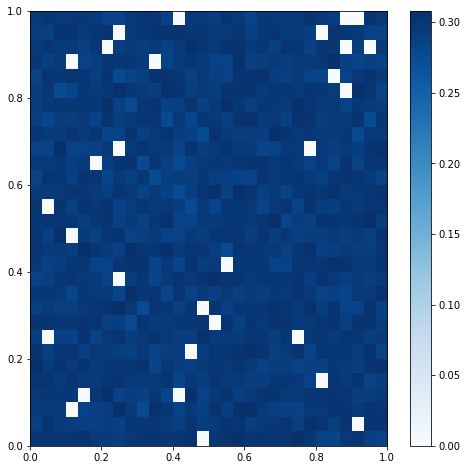

In [42]:
plt.figure( figsize=(8,8))
x_list = np.array(gTEs)
y_list = np.array(gEEs)
z_list = np.array(Z)
#z_list = np.log(z_list+1)

Nz = int(len(z_list)**.5)
z = z_list.reshape(Nz, Nz)
plt.imshow(z, extent=(np.amin(x_list), np.amax(x_list), np.amin(y_list),
                      np.amax(y_list)),  aspect = 'auto', cmap='Blues') #norm=LogNorm(),
plt.colorbar()
plt.savefig("./figure/" +str(N*N)+ "_range_"+str(g_EE_Lamb)+".png")
plt.show()

In [10]:
#plt.contourf(gTEs, gEEs, Z)

In [47]:
import os 
import numpy as np

In [255]:
# Scanning g vs m
scen = 0

basesX_0=(0.001, 1.85)
basesX_1=(0.001, 1.85)
basesX_2=(0.1, 1.85)
basesX_3=(0.001, 1.75)
basesX_4=(0.1, 1.85)

total_list = [basesX_0,basesX_1,basesX_2,basesX_3,basesX_4]

basesY=(1, 1.5, 2, 3, 4, 6, 8)
expY=range(-9,-1)

np.savez_compressed("./storage/g_m_rangeX",basesX_0=basesX_0, basesX_1=basesX_1, basesX_2=basesX_2, basesX_3=basesX_3, basesX_4=basesX_4)

nMC = 10000

In [256]:
data = np.load("./storage/g_m_rangeX.npz")

print(data.files)
print(type(data.files))

print(total_list[0][0]) #not a readible form
print(data["basesX_"+str(scen)])
print(data["basesX_"+str(scen)][0])
print(type(data["basesX_"+str(scen)]))
print(type(data["basesX_"+str(scen)][0]))

print("basesX_"+str(scen)) #not a variable, but a string
print(type("basesX_"+str(scen)))

data["basesX_"+str(scen)].shape

['basesX_0', 'basesX_1', 'basesX_2', 'basesX_3', 'basesX_4']
<class 'list'>
0.001
[1.00e-03 1.85e+00]
0.001
<class 'numpy.ndarray'>
<class 'numpy.float64'>
basesX_0
<class 'str'>


(2,)

In [257]:
m_Run = np.linspace(data["basesX_"+str(scen)][0],data["basesX_"+str(scen)][1],30)
m_Add = np.linspace(m_Run[0],m_Run[1],30)
m_Run = list(m_Run) + list(m_Add)
g_Run = [ba*10**exp for ba in basesY for exp in expY]

In [258]:
#m_Run, g_Run

In [259]:
for g in g_Run:
    for m in m_Run:
        os.system("nohup ./main "+str(scen)+" "+str(m)+" "+str(g)+" "+str(g)+" "+str(nMC)+" > ./storage/result_g_m_"+str(scen)+"/out_"+str(m)+"_"+str(g)+".out 2>&1 &")

In [ ]:
# 